This is a detailed EDA of the data, shown in the second video of "Exploratory data analysis" lecture (week 2).

## Load data

In this competition hosted by *solutions.se*, the task was to predict the advertisement cost for a particular ad. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_path = './data'
train = pd.read_csv('%s/train.csv.gz' % data_path, parse_dates=['Date'])
test  = pd.read_csv('%s/test.csv.gz' % data_path,  parse_dates=['Date'])

Let's look at the data (notice that the table is transposed, so we can see all feature names). 

In [2]:
train.head().T

,0,1,2,3,4
AdGroupId,78db034136,68a0110c69,21af1035af,f63fda0c33,cd868ebdcc
AdGroupName,6d91d 25866 9c594,2657d cb2d0 6d91d,6d91d e33a0 9a99b,59991 9c594,6d91d 25866 9a99b
AdNetworkType2,s,s,s,s,s
AveragePosition,1.2,2,1,1,1.1
CampaignId,273823cb71,273823cb71,273823cb71,273823cb71,273823cb71
CampaignName,2657d 16cb2 74532 b4842 0136e 35aca f140d,2657d 16cb2 74532 b4842 0136e 35aca f140d,2657d 16cb2 74532 b4842 0136e 35aca f140d,2657d 16cb2 74532 b4842 0136e 35aca f140d,2657d 16cb2 74532 b4842 0136e 35aca f140d
Clicks,0,0,0,0,3
Conversions,0,0,0,0,0
ConversionsManyPerClick,0,0,0,0,0
Cost,0,0,0,0,0.94


We see a lot of features with not obvious names. If you search for the *CampaignId*, *AdGroupName*, *AdNetworkType2* using any web search engine, you will find this dataset was exported from Google AdWords. So what is the required domain knowledge here? The knowledge of how web advertisement and Google AdWords work! After you have learned it, the features will make sense to you and you can proceed.

For the sake of the story I will briefly describe Google AdWords system now. Basically every time a user queries a search engine, Google AdWords decides what ad will be shown along with the actual search results. On the other side of AdWords, the advertisers manage the ads -- they can set a multiple keywords, that a user should query in order to their ad to be shown. If the keywords are set properly and are relevant to the ad, then the ad will be shown to relevant users and the ad will get clicked. Advertisers pay to Google for some type of events, happened with their ad: for example for a click event, i.e. the user saw this ad and clicked it. AdWords uses complex algorithms to decide which ad to show to a particular user with a particular search query. The advertisers can only indirectly influence AdWords decesion process by changing keywords and several other parameters. So at a high level, the task is to predict what will be the costs for the advertiser (how much he will pay to Google, column *Cost*) when the parameters (e.g. keywords) are changed.

The ads are grouped in groups, there are features *AdGroupId* *AdGroupName* describing them. A campaign corresponds to some specific parameters that an advertiser sets. Similarly, there are ID and name features *CampaignId*, *CampaignName*. And finally there is some information about keywords: *KeywordId* and *KeywordText*. Slot is $1$ when ad is shown on top of the page, and $2$ when on the side. Device is a categorical variable and can be either "tablet", "mobile" or "pc". And finally the *Date* is just the date, for which clicks were aggregated. 

In [3]:
test.head().T

,0,1,2,3,4
Id,0,1,2,3,4
AdGroupId,00096e7611,00096e7611,00096e7611,00096e7611,00096e7611
AdGroupName,c8037 75b01 9a99b 3b678 52ba4 2657d,c8037 75b01 9a99b 3b678 52ba4 2657d,c8037 75b01 9a99b 3b678 52ba4 2657d,c8037 75b01 9a99b 3b678 52ba4 2657d,c8037 75b01 9a99b 3b678 52ba4 2657d
AdNetworkType2,s,s,s,s,s
AveragePosition,1,1,1,1,1
CampaignId,e62b4bc4c3,e62b4bc4c3,e62b4bc4c3,e62b4bc4c3,e62b4bc4c3
CampaignName,2657d 16cb2 74532 06feb 0136e 3a15d,2657d 16cb2 74532 06feb 0136e 3a15d,2657d 16cb2 74532 06feb 0136e 3a15d,2657d 16cb2 74532 06feb 0136e 3a15d,2657d 16cb2 74532 06feb 0136e 3a15d
Date,2014-06-01 00:00:00,2014-06-01 00:00:00,2014-06-01 00:00:00,2014-06-01 00:00:00,2014-06-01 00:00:00
DestinationUrl,f5aad09031,f5aad09031,f5aad09031,f5aad09031,f5aad09031
Device,t,d,m,t,d


Notice there is diffrent number of columns in test and train -- our target is *Cost* column, but it is closly related to several other features, e.g. *Clicks*, *Conversions*. All of the related columns were deleted from the test set to avoid data leakages.

# Let's analyze

Are we ready to modeling? Not yet. Take a look at this statistic:

In [4]:
print 'Train min/max date: %s / %s' % (train.Date.min().date(), train.Date.max().date())
print 'Test  min/max date: %s / %s' % ( test.Date.min().date(),  test.Date.max().date())
print ''
print 'Number of days in train: %d' % ((train.Date.max() - train.Date.min()).days + 1)
print 'Number of days in test:  %d' % (( test.Date.max() -  test.Date.min()).days + 1)
print ''
print 'Train shape: %d rows' % train.shape[0]
print 'Test shape: %d rows'  % test.shape[0]

Train min/max date: 2014-01-01 / 2014-05-31
Test  min/max date: 2014-06-01 / 2014-06-14

Number of days in train: 151
Number of days in test:  14

Train shape: 3493820 rows
Test shape: 8951040 rows


Train period is more than 10 times larger than the test period, but train set has fewer rows, how could that happen? 

At this point I suggest you to stop and think yourself, what could be a reason, why this did happen. Unfortunately we cannot share the data for this competition, but the information from above should be enough to get a right idea. 

Alternatively, you can go along for the explanation, if you want. 

# Investigation

Let's take a look how many rows with each date we have in train and test.

In [5]:
test.Date.value_counts()

2014-06-02    639360
2014-06-12    639360
2014-06-09    639360
2014-06-14    639360
2014-06-01    639360
2014-06-11    639360
2014-06-08    639360
2014-06-05    639360
2014-06-10    639360
2014-06-07    639360
2014-06-04    639360
2014-06-06    639360
2014-06-03    639360
2014-06-13    639360
Name: Date, dtype: int64

In [6]:
# print only first 10
train.Date.value_counts().head(10)

2014-01-01    36869
2014-01-04    36427
2014-01-05    36137
2014-01-02    34755
2014-01-03    34693
2014-01-06    31349
2014-04-07    30950
2014-02-09    30101
2014-01-26    29830
2014-02-08    29187
Name: Date, dtype: int64

Interesting, for the test set we have the same number of rows for every date, while in train set the number of rows is different for each day. It looks like that for each day in the test set a loop through some kind of IDs had been run. But what about train set? So far we don't know, but let's find the test IDs first.

### Test

So now we know, that there is $639360$ different IDs. It should be easy to find the columns, that form ID, because if the ID is ['col1', 'col2'], then to compute the number of combinations  we should just multiply the number of unique elements in each. 

In [7]:
test_nunique = test.nunique()
test_nunique

Id                  8951040
AdGroupId             13548
AdGroupName            2281
AdNetworkType2            2
AveragePosition         131
CampaignId              252
CampaignName            252
Date                     14
DestinationUrl        52675
Device                    3
KeywordId             12285
KeywordMatchType          3
KeywordText           11349
Slot                      4
dtype: int64

In [8]:
import itertools

# This function looks for a combination of elements 
# with product of 639360 
def find_prod(data):
    # combinations of not more than 5 features
    for n in range(1, 5):
        # iterate through all combinations
        for c in itertools.combinations(range(len(data)), n):
            if data[list(c)].prod() == 639360:
                print test_nunique.index[c]
                return
    print 'Nothing found'

    
find_prod(test_nunique.values)

Nothing found


Hmm, nothing found! The problem is that some features are tied, and the number of their combinations does not equal to product of individual unique number of elements. For example it does not make sense to create all possible combinations of *DestinationUrl* and *AdGroupId* as *DestinationUrl* belong to exactly one *AdGroupId*.

In [9]:
test.groupby('DestinationUrl').AdGroupId.nunique()

DestinationUrl
00010d62df    1
000249f717    1
00054cf3f8    1
000684bf0b    1
00072a9fa7    1
00077a6729    1
0007cc191f    1
0009388900    1
001144cae4    1
00115f6477    1
00141a299f    1
00169dc49b    1
0018b27e06    1
001b0b3d06    1
001ef8368e    1
00205e056a    1
002082ab8b    1
0020c585ea    1
0021419f7e    1
00225519cc    1
002498dc88    1
0026171436    1
00265dc4bb    1
0026833e5c    1
0027ffbad9    1
002b1deb25    1
002c55ccef    1
002e44290f    1
0030ca870e    1
0032b64beb    1
             ..
ffda377018    1
ffda3c412a    1
ffda5b53d6    1
ffda8c0d8c    1
ffdbf5d179    1
ffdc872fcf    1
ffde114af5    1
ffde41a800    1
ffe2fb7007    1
ffe4a040d4    1
ffe685e937    1
ffe8c3da53    1
ffe8f82e08    1
ffeb9fda9d    1
ffebd1d253    1
ffebea724f    1
ffecf398b1    1
ffecf3e7d4    1
ffed185438    1
fff02d7269    1
fff10adcb0    1
fff12e5f19    1
fff132d5bd    1
fff19836a0    1
fff3539204    1
fff4c5d255    1
fff55db78a    1
fff8c11ad9    1
fff90ea351    1
fffb248bf0    1
Name: AdG

So, now let's try to find ID differently. Let's try to find a list of columns, such that threre is exazctly $639360$ unique combinations of their values **in the test set** (not overall). So, we want to find `columns`, such that:

In [ ]:
test[columns].drop_duplicates().shape[0]  == 639360

We could do it with a similar loop.

In [ ]:
import itertools

def find_ncombinations(data):
    # combinations of not more than 5 features
    for n in range(1, 5):
        for c in itertools.combinations(range(data.shape[1]), n):
            print c
            columns = test.columns[list(c)]
            if test[columns].drop_duplicates().shape[0] == 639360:
                print columns
                return
    print 'Nothing found'

    
find_ncombinations(test)

But it will take forever to compute. So it is easier to find the combination manually.

So after some time of trials and errors I figured out, that the four features *KeywordId, AdGroupId, Device, Slot* form the index. The number of unique rows is exactly *639360* as we wanted to find.

In [10]:
columns = ['KeywordId', 'AdGroupId', 'Device', 'Slot']
test[columns].drop_duplicates().shape

(639360, 4)

Looks reasonable. For each *AdGroupId* there is a **distinct set** of possible *KeywordId's*, but *Device* and *Slot* variants are the same for each ad. And the target is to predict what will be the daily cost for using different *KeywordId's*, *Device* type, *Slot* type to advertise ads from *AdGroups*.

### Train

To this end, we found how test set was constructed, but what about the train set? Let us plot something, probably we will find it out. 

In [11]:
import seaborn as sns
sns.set(palette='pastel')
sns.set(font_scale=2)

In [12]:
# from absolute dates to relative
train['date_diff'] =  (train.Date - train.Date.min()).dt.days

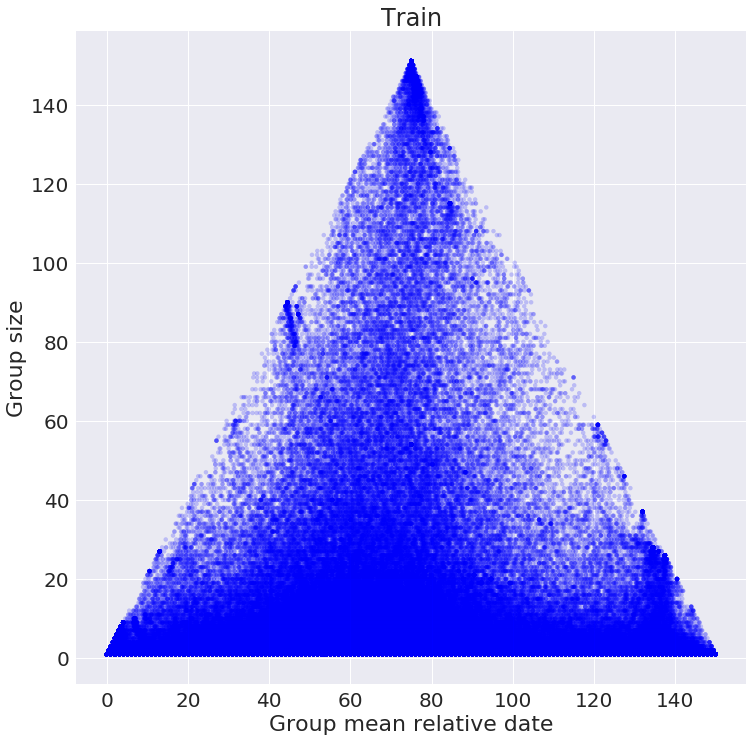

In [13]:
# group by the index, that we've found
g= train.groupby(['KeywordId', 'AdGroupId', 'Device', 'Slot'])

# and for each index show average relative date versus 
# the number of rows with that index
plt.figure(figsize=(12,12))
plt.scatter(g.date_diff.mean(),g.size(),edgecolor = 'none',alpha = 0.2, s=20, c='b')
plt.xlabel('Group mean relative date')
plt.ylabel('Group size')
plt.title('Train');

Looks interesting, isn't it? That is something we need to explain! How the same plot looks for the test set?

In [14]:
# from absolute dates to relative
test['date_diff'] =  (test.Date - test.Date.min()).dt.days

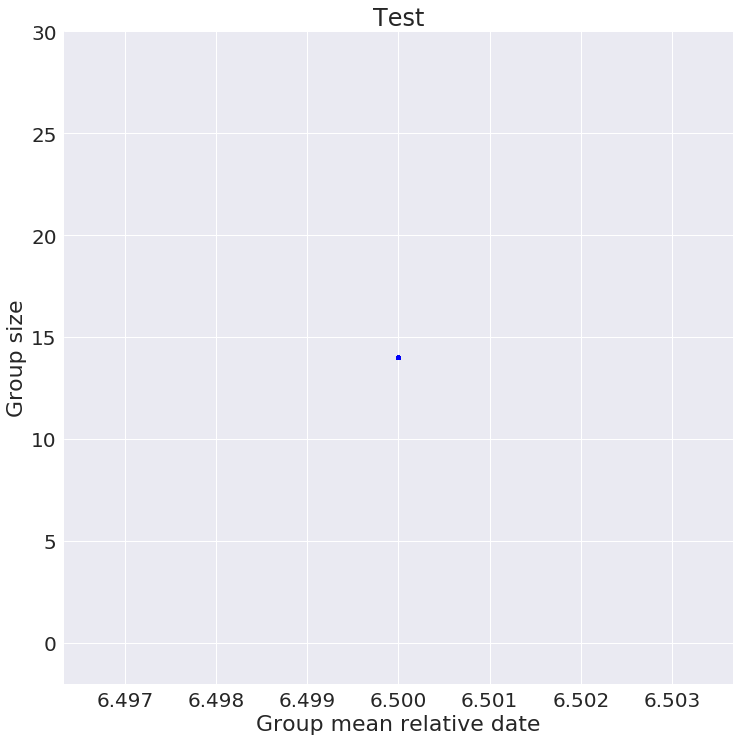

In [15]:
# group by the index, that we've found
g= test.groupby(['KeywordId', 'AdGroupId', 'Device', 'Slot'])

# and for each index show average relative date versus 
# the number of rows with that index
plt.figure(figsize=(12,12))
plt.scatter(g.date_diff.mean(),g.size(),edgecolor = 'none',alpha = 0.2, s=20, c='b')
plt.xlabel('Group mean relative date')
plt.ylabel('Group size')
plt.ylim(-2, 30)
plt.title('Test');

Just a dot! 

Now let's think, what we actually plotted? We grouped the data by the ID that we've found previously and we plotted average *Date* in the group versus the size of each group. We found that ID is an aggregation index -- so for each date the *Cost* is aggreagated for each possible index. So group size shows for how many days we have *Const* information for each ID and mean relative date shows some information about these days.    

For test set it is expectable that both average date and the size of the groups are the same for each group: the size of each group is $14$ (as we have $14$ test days) and mean date is $6.5$, because for each group (index) we have $14$ different days, and $\frac{0 + 1 + \dots + 13}{14} = 6.5$.

And now we can explain everything for the train set. Look at the top of the triangle: for those points (groups) we have *Cost* information for all the days in the train period, while on the sides we see groups, for which we have very few rows.

But why for some groups we have smaller number of rows, than number of days? Let's look at the *Impressions* column.

In [16]:
train.Impressions.value_counts()

1         1602929
2          565896
3          287128
4          175197
5          119092
6           86651
7           66443
8           53007
9           42984
10          35731
11          30248
12          25950
13          22629
14          20126
15          17503
16          15682
17          14100
18          12848
19          11597
20          10724
21           9864
22           8931
23           8316
24           7953
25           7168
26           6684
27           6196
28           5863
29           5556
30           5223
           ...   
4978            1
15210           1
9076            1
13174           1
116535          1
4979            1
17273           1
90974           1
4976            1
5906            1
7023            1
60282           1
7955            1
13881           1
2921            1
4970            1
7019            1
17249           1
23394           1
28210           1
11116           1
15929           1
7017            1
95761           1
2923      

We never have $0$ value in *Imressions* column. But in reality, of course, some ads with some combination of keyword, slot, device were never shown. So this looks like a nice explanation for the data: in the train set we **only**  have information about ads (IDs, groups) which were shown at least once. And for the test set, we, of course, want to predict *Cost* **for every** possible ID. 

What it means for competitors, is that if one would just fit a model on the train set as is, the predictions for the test set will be biased by a lot. The predictions will be much higher than they should be, as we are only given a specific subset of rows as `train.csv` file. 

So, before modeling we should first extend the trainset and inject rows with `0` impressions. Such change will make train set very similar to the test set and the models will generalize nicely.  